In [3]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from keras.models import Model, Sequential
from keras.layers import Dense,BatchNormalization,Conv2D, Conv1D
from keras.layers import Input,GlobalMaxPooling2D,concatenate, GlobalMaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from os import listdir, getcwd, chdir
from os.path import isfile, join

In [4]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir"
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/nancelab/diff_predictor/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/nancelab/diff_predictor


In [5]:
data_path = '../diff_predictor/data/cortex_mpt_data_nonans/'
filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) 
    #and 'P10F' in f
    and 'ChABC' not in f
    and 'HYase' not in f
    and 'msd_NT' not in f]
    # and 'P21' not in f
    # and 'P28' not in f]

# print('not treated datasets')
p14_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'P14' in f]
p14_count = len(p14_filelist)
print(len(p14_filelist))
p21_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'P21' in f]
p21_count = len(p21_filelist)
print(len(p21_filelist))
p28_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'P28' in f]
p28_count = len(p28_filelist)
print(len(p28_filelist))
p35_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'P35' in f]
p35_count = len(p35_filelist)
print(len(p35_filelist))
p70_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'P70' in f]
p70_count = len(p70_filelist)
print(len(p70_filelist))

treatment_nt_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'msd_NT' in f]
print(len(treatment_nt_filelist))


# # # Will need some extra stuff
region_cortex_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'cortex' in f and 'P10F' not in f]
region_count = len(region_cortex_filelist)
print(len(region_cortex_filelist))


NT_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'P10F_NT' in f]
nt_count = len(NT_filelist)
print(len(NT_filelist))
print()
# print('treaated datasets')

chabc_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f) and 'ChABC' in f)]
print(len(chabc_filelist))
hyase_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f) and 'HYase' in f)]
print(len(hyase_filelist))

oneuM_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '1uM' in f]
oneum_count = len(oneuM_filelist)
print(len(oneuM_filelist))
fiveuM_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '5uM' in f]
fiveum_count = len(fiveuM_filelist)
print(len(fiveuM_filelist))
tenuM_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '10uM' in f]
tenum_count = len(tenuM_filelist)
print(len(tenuM_filelist))
fiftynM_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '50nM' in f]
fiftynm_count = len(fiftynM_filelist)
print(len(fiftynM_filelist))



print(len(filelist)) #Check to make sure there are the right number of files, in this case 180 - 60 per class

5655
19378
5435
16595
14551
105638
35802
15875

0
0
10389
8631
15968
20700
133177


In [93]:
tenuM_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '10uM' in f]
tenum_count = len(tenuM_filelist)
print(len(tenuM_filelist))

15968


In [2]:
nontreated_tot = p14_count+p21_count+p28_count+p35_count+p70_count+region_count+nt_count
print(nontreated_tot)

treated_tot = fiftynm_count+oneum_count+fiveum_count+tenum_count
print(treated_tot)

NameError: name 'p14_count' is not defined

In [42]:
# print('not treated datasets')

p14_training_filelist = list(np.random.choice(p14_filelist, size=int(len(p14_filelist)*0.8), replace=False))
p14_validation_filelist = [f for f in p14_filelist if f not in p14_training_filelist]

p21_training_filelist = list(np.random.choice(p21_filelist, size=int(len(p21_filelist)*0.8), replace=False))
p21_validation_filelist = [f for f in p21_filelist if f not in p21_training_filelist]

p28_training_filelist = list(np.random.choice(p28_filelist, size=int(len(p28_filelist)*0.8), replace=False))
p28_validation_filelist = [f for f in p28_filelist if f not in p28_training_filelist]


p35_training_filelist = list(np.random.choice(p35_filelist, size=int(len(p35_filelist)*0.8), replace=False))
p35_validation_filelist = [f for f in p35_filelist if f not in p35_training_filelist]

p70_training_filelist = list(np.random.choice(p70_filelist, size=int(len(p70_filelist)*0.8), replace=False))
p70_validation_filelist = [f for f in p70_filelist if f not in p70_training_filelist]

# treatment_nt_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'msd_NT' in f]
# print(len(treatment_nt_filelist))


# # # # Will need some extra stuff

region_training_filelist = list(np.random.choice(region_cortex_filelist, size=int(len(region_cortex_filelist)*0.8), replace=False))
region_validation_filelist = [f for f in region_cortex_filelist if f not in region_training_filelist]


nt_training_filelist = list(np.random.choice(NT_filelist, size=int(len(NT_filelist)*0.8), replace=False))
nt_validation_filelist = [f for f in NT_filelist if f not in nt_training_filelist]

oneum_training_filelist = list(np.random.choice(oneuM_filelist, size=int(len(oneuM_filelist)*0.8), replace=False))
oneum_validation_filelist = [f for f in oneuM_filelist if f not in oneum_training_filelist]

fiveum_training_filelist = list(np.random.choice(fiveuM_filelist, size=int(len(fiveuM_filelist)*0.8), replace=False))
fiveum_validation_filelist = [f for f in fiveuM_filelist if f not in fiveum_training_filelist]

tenum_training_filelist = list(np.random.choice(tenuM_filelist, size=int(len(tenuM_filelist)*0.8), replace=False))
tenum_validation_filelist = [f for f in tenuM_filelist if f not in tenum_training_filelist]

fiftynm_training_filelist = list(np.random.choice(fiftynM_filelist, size=int(len(fiftynM_filelist)*0.8), replace=False))
fiftynm_validation_filelist = [f for f in fiftynM_filelist if f not in fiftynm_training_filelist]

# fiftynM_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '50nM' in f]
# fiftynm_count = len(fiftynM_filelist)
# print(len(fiftynM_filelist))

In [94]:
tenum_training_filelist = list(np.random.choice(tenuM_filelist, size=int(len(tenuM_filelist)*0.8), replace=False))
tenum_validation_filelist = [f for f in tenuM_filelist if f not in tenum_training_filelist]

In [74]:
p14_training_filelist

['msd_P14_40nm_s1_v2_track_874.npy',
 'msd_P14_40nm_s1_v2_track_719.npy',
 'msd_P14_40nm_s1_v1_track_710.npy',
 'msd_P14_40nm_s1_v1_track_283.npy',
 'msd_P14_40nm_s1_v5_track_65.npy',
 'msd_P14_40nm_s1_v5_track_143.npy',
 'msd_P14_40nm_s1_v3_track_394.npy',
 'msd_P14_40nm_s1_v2_track_523.npy',
 'msd_P14_40nm_s1_v2_track_892.npy',
 'msd_P14_40nm_s2_v2_track_644.npy',
 'msd_P14_40nm_s3_v3_track_242.npy',
 'msd_P14_40nm_s3_v3_track_270.npy',
 'msd_P14_40nm_s1_v1_track_471.npy',
 'msd_P14_40nm_s3_v2_track_27.npy',
 'msd_P14_40nm_s3_v4_track_65.npy',
 'msd_P14_40nm_s2_v1_track_156.npy',
 'msd_P14_40nm_s1_v2_track_103.npy',
 'msd_P14_40nm_s3_v2_track_153.npy',
 'msd_P14_40nm_s2_v1_track_63.npy',
 'msd_P14_40nm_s3_v2_track_61.npy',
 'msd_P14_40nm_s3_v5_track_258.npy',
 'msd_P14_40nm_s3_v3_track_114.npy',
 'msd_P14_40nm_s2_v2_track_268.npy',
 'msd_P14_40nm_s2_v2_track_160.npy',
 'msd_P14_40nm_s2_v1_track_334.npy',
 'msd_P14_40nm_s2_v2_track_835.npy',
 'msd_P14_40nm_s2_v2_track_630.npy',
 'msd_

In [95]:
nontreated_filelist_training = nt_training_filelist #+ region_training_filelist#p14_training_filelist+ p21_training_filelist + p28_training_filelist + p35_training_filelist + p70_training_filelist + region_training_filelist + nt_training_filelist
treated_filelist_training = tenum_training_filelist#fiftynm_training_filelist+oneum_training_filelist+fiveum_training_filelist+tenum_training_filelist
print(len(nontreated_filelist_training))
print(len(treated_filelist_training))

12700
12774


In [96]:
downsampled_nontreated_filelist_training = list(np.random.choice(nontreated_filelist_training, len(treated_filelist_training), replace=False))
print(len(downsampled_nontreated_filelist_training))

ValueError: Cannot take a larger sample than population when 'replace=False'

In [46]:
nontreated_filelist_validation = nt_validation_filelist#+region_validation_filelist#p14_validation_filelist+ p21_validation_filelist + p28_validation_filelist + p35_validation_filelist + p70_validation_filelist + region_validation_filelist + nt_validation_filelist
treated_filelist_validation = tenum_validation_filelist#fiftynm_validation_filelist+oneum_validation_filelist+fiveum_validation_filelist+tenum_validation_filelist
print(len(nontreated_filelist_validation))
print(len(treated_filelist_validation))

3175
684


In [47]:
downsampled_nontreated_filelist_validation = list(np.random.choice(nontreated_filelist_validation, len(treated_filelist_validation), replace=False))
print(len(downsampled_nontreated_filelist_validation))

684


In [170]:
downsampled_p70_filelist_training = list(np.random.choice(p70_training_filelist, len(p14_training_filelist), replace=False))
print(len(downsampled_p70_filelist_training))

4524


In [183]:
downsampled_p70_filelist_validation= list(np.random.choice(p70_validation_filelist, len(p14_validation_filelist), replace=False))
print(len(downsampled_p70_filelist_validation))

1131


In [184]:
len(p14_validation_filelist)

1131

In [203]:
partition = dict()

In [204]:
track_ids = []
training_labels = dict()
for file in (p14_training_filelist + downsampled_p70_filelist_training):

    label = file[:-4]
    if "14" in file:
        training_labels[str(label)] = 1
    
    else:
        training_labels[str(label)] = 0
    track_ids.append(str(label))
        #np.save(str(f'data/10div_train_min50steps/{file}').replace(".csv", f"_track_{int(track_id)}"), test_array)

partition['train'] = track_ids

In [205]:
validation_track_ids = []
validation_labels = dict()
for file in (p14_validation_filelist + downsampled_p70_filelist_validation):

    label = file[:-4]
    if "14" in file:
        validation_labels[str(label)] = 1
    
    else:
        validation_labels[str(label)] = 0
    track_ids.append(str(label))
        #np.save(str(f'data/10div_train_min50steps/{file}').replace(".csv", f"_track_{int(track_id)}"), test_array)

partition['validation'] = validation_track_ids

In [98]:
#set up training files and labels
min = 10000
max = 0

track_ids = []
training_labels = dict()
for file in (treated_filelist_training + nontreated_filelist_training):


    
#     track_data = df[df['Track_ID']==track_id][['X', 'Y']]
#     track_data = track_data.fillna(0)
# #     #dataset[str(track_id)] = np.array(track_data)

#     test_array = np.array(track_data)
    #norm_array = normalize(test_array)
    # print(np.count_nonzero(test_array))
    # lengths.append(len(test_array))
    #print(np.count_nonzero(np.isnan(test_array)))
    #if np.count_nonzero(test_array) >200:
        # print(np.count_nonzero(test_array))
    #out_array = np.load(data_path + file)
    # if np.min(out_array) < min:
    #     min = np.min(out_array)
    # if np.max(out_array) > max:
    #     max = np.max(out_array)

    #no_zeros = np.argwhere(out_array)
    #print(len(no_zeros))
    #if len(out_array) >=100:
    label = file[:-4]
    if "uM" in file:
        training_labels[str(label)] = 1
    elif "nM" in file:
        training_labels[str(label)] = 1
    elif "ChABC" in file:
        training_labels[str(label)] = 1
    elif "HYase" in file:
        training_labels[str(label)] = 1
    else:
        training_labels[str(label)] = 0
    track_ids.append(str(label))
        #np.save(str(f'data/10div_train_min50steps/{file}').replace(".csv", f"_track_{int(track_id)}"), test_array)

partition['train'] = track_ids
   

In [99]:
#set up training files and labels
min = 10000
max = 0

validation_track_ids = []
validation_labels = dict()
for file in (treated_filelist_validation + nontreated_filelist_validation):


    
#     track_data = df[df['Track_ID']==track_id][['X', 'Y']]
#     track_data = track_data.fillna(0)
# #     #dataset[str(track_id)] = np.array(track_data)

#     test_array = np.array(track_data)
    #norm_array = normalize(test_array)
    # print(np.count_nonzero(test_array))
    # lengths.append(len(test_array))
    #print(np.count_nonzero(np.isnan(test_array)))
    #if np.count_nonzero(test_array) >200:
        # print(np.count_nonzero(test_array))
    #out_array = np.load(data_path + file)
    # if np.min(out_array) < min:
    #     min = np.min(out_array)
    # if np.max(out_array) > max:
    #     max = np.max(out_array)

    #no_zeros = np.argwhere(out_array)
    #print(len(no_zeros))
    #if len(out_array) >=100:
    label = file[:-4]
    if "uM" in file:
        validation_labels[str(label)] = 1
    elif "nM" in file:
        validation_labels[str(label)] = 1
    elif "ChABC" in file:
        validation_labels[str(label)] = 1
    elif "HYase" in file:
        validation_labels[str(label)] = 1
    else:
        validation_labels[str(label)] = 0
    validation_track_ids.append(str(label))
        #np.save(str(f'data/10div_train_min50steps/{file}').replace(".csv", f"_track_{int(track_id)}"), test_array)

partition['validation'] = validation_track_ids
   

In [99]:
scaled_array = out_array/max

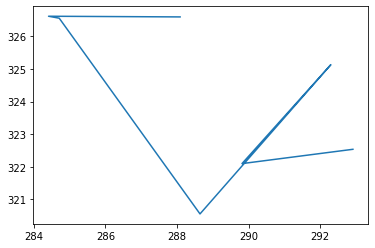

In [102]:
plt.plot(out_array[:,0], out_array[:,1])

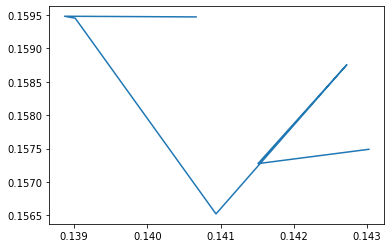

In [101]:
plt.plot(scaled_array[:,0], scaled_array[:,1])

In [8]:
validation_filelist = one_um_filelist[3:] + nt_filelist[3:]
print(len(validation_filelist))

2


In [32]:
#set up validation files and labels

track_ids = []
validation_labels = dict()
for file in validation_filelist:

    df = pd.read_csv(data_path + file)

    for track_id in df['Track_ID'].unique():
        label = file[:-4] + f'_track_{int(track_id)}'
        if "NT" in file:
            validation_labels[str(label)] = 1
        else:
            validation_labels[str(label)] = 0
        
        track_data = df[df['Track_ID']==track_id][['X', 'Y']]
        track_data = track_data.fillna(0)
    #     #dataset[str(track_id)] = np.array(track_data)
        test_array = np.array(track_data)
        #norm_array = normalize(test_array)
        if np.count_nonzero(test_array) >200:
            track_ids.append(str(label))
            #np.save(str(f'data/10div_val_min50steps/{file}').replace(".csv", f"_track_{int(track_id)}"), test_array)

partition['validation'] = track_ids

In [7]:
test_array[:,0]

NameError: name 'test_array' is not defined

In [10]:
cnn_data_path = '../diff_predictor/data/10div_training_data/'
one_um_filelist = [f for f in listdir(cnn_data_path) if isfile(join(cnn_data_path, f)) and '1uM' in f]

nt_filelist = [f for f in listdir(cnn_data_path) if isfile(join(cnn_data_path, f)) and 'NT' in f]
len(one_um_filelist)

18094

In [27]:
out = out[out!=0]
out.shape

(364,)

In [30]:
counter = 0


26


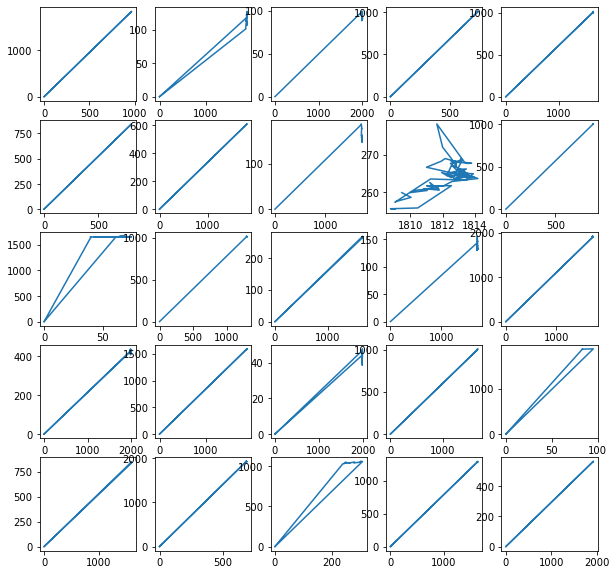

In [36]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        file = np.load(cnn_data_path+one_um_filelist[counter])
        if np.count_nonzero(file) >0:
            counter += 1
            axes[i,j].plot(file[:,0], file[:,1])
print(counter)

51


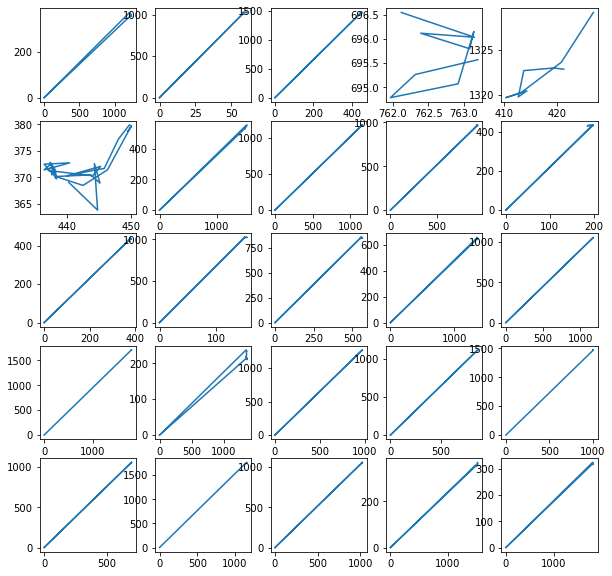

In [37]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        file = np.load(cnn_data_path+nt_filelist[counter])
        counter += 1
        axes[i,j].plot(file[:,0], file[:,1])
print(counter)

In [62]:
partition.keys

<function dict.keys>

In [21]:
def testing_data_generation(data_path, list_IDs_temp, labels, batch_size, dim=(651,2)):
    'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
    # Initialization
    X = np.empty(dim)#, self.n_channels))
    y = np.empty(dtype=int)

    # Generate data
    for i, ID in enumerate(list_IDs_temp):
        # Store sample
        out_array = np.load(data_path + ID + '.npy')
        out_array = normalize(out_array)
        X = out_array

        # Store class
        y[i] = labels[ID]

    return X, keras.utils.to_categorical(y, num_classes=2)

In [22]:
x, y = testing_data_generation('../diff_predictor/data/cortex_mpt_datasets/', partition['train'], training_labels, batch_size=32)

IndexError: index 32 is out of bounds for axis 0 with size 32

In [136]:
class MptDataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data_path, list_IDs, labels, batch_size=64, dim=(651,2), n_channels=None,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.data_path = data_path
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size, *self.dim))#, self.n_channels))
        y = np.zeros((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            out_array = np.load(self.data_path + ID + '.npy')
            out_array = out_array[:self.dim[0], :self.dim[1]]
            out_array_scaled = out_array[:-1] - out_array[1:]
            #out_array_scaled = out_array/2048.0
            #out_array = normalize(out_array)
            X[i, 0:len(out_array_scaled), 0:2] = out_array_scaled

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)


In [160]:
def get_confmatrix_xys(list_ids, data_path, labels, dim, num_classes):
    X = np.zeros((len(list_ids), *dim))#, self.n_channels))
    y = np.zeros(len(list_ids), dtype=int)
    for i, ID in enumerate(list_ids):
            # Store sample
            out_array = np.load(data_path + ID + '.npy')
            out_array = out_array[:dim[0], :dim[1]]
            out_array_scaled = out_array[:-1] - out_array[1:]
            #out_array_scaled = out_array/2048.0
            #out_array = normalize(out_array)
            X[i, 0:len(out_array_scaled), 0:2] = out_array_scaled

            # Store class
            y[i] = labels[ID]

    return X, y

In [161]:
x, y = get_confmatrix_xys(list_ids=partition['validation'], data_path='../diff_predictor/data/cortex_mpt_data_nonans/', labels=validation_labels, dim=(651,2), num_classes=2)

In [33]:
test_array = np.array([5, 4, 3, 2, 1])
subbed_arra = test_array[:-1] - test_array[1:]
subbed_arra

array([1, 1, 1, 1])

In [84]:
training_labels

{'msd_P14_40nm_s1_v2_track_874': 1,
 'msd_P14_40nm_s1_v2_track_719': 1,
 'msd_P14_40nm_s1_v1_track_710': 1,
 'msd_P14_40nm_s1_v1_track_283': 1,
 'msd_P14_40nm_s1_v5_track_65': 1,
 'msd_P14_40nm_s1_v5_track_143': 1,
 'msd_P14_40nm_s1_v3_track_394': 1,
 'msd_P14_40nm_s1_v2_track_523': 1,
 'msd_P14_40nm_s1_v2_track_892': 1,
 'msd_P14_40nm_s2_v2_track_644': 1,
 'msd_P14_40nm_s3_v3_track_242': 1,
 'msd_P14_40nm_s3_v3_track_270': 1,
 'msd_P14_40nm_s1_v1_track_471': 1,
 'msd_P14_40nm_s3_v2_track_27': 1,
 'msd_P14_40nm_s3_v4_track_65': 1,
 'msd_P14_40nm_s2_v1_track_156': 1,
 'msd_P14_40nm_s1_v2_track_103': 1,
 'msd_P14_40nm_s3_v2_track_153': 1,
 'msd_P14_40nm_s2_v1_track_63': 1,
 'msd_P14_40nm_s3_v2_track_61': 1,
 'msd_P14_40nm_s3_v5_track_258': 1,
 'msd_P14_40nm_s3_v3_track_114': 1,
 'msd_P14_40nm_s2_v2_track_268': 1,
 'msd_P14_40nm_s2_v2_track_160': 1,
 'msd_P14_40nm_s2_v1_track_334': 1,
 'msd_P14_40nm_s2_v2_track_835': 1,
 'msd_P14_40nm_s2_v2_track_630': 1,
 'msd_P14_40nm_s2_v1_track_164': 

In [206]:
training_generator = MptDataGenerator('../diff_predictor/data/cortex_mpt_data_nonans/', partition['train'], training_labels, batch_size=32, dim=(651,2))

In [207]:
validation_generator = MptDataGenerator('../diff_predictor/data/cortex_mpt_data_nonans/', partition['validation'], validation_labels, batch_size=32, dim=(651,2))

In [208]:
inputs = Input((651, 2))
initializer = 'he_normal'
f = 32

In [209]:
x1 = Conv1D(f,4,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalMaxPooling1D()(x1)

dense = Dense(512,activation='relu')(x1)
dense = Dense(256,activation='relu')(dense)
dense2 = Dense(2,activation='softmax')(dense)
model = Model(inputs=inputs, outputs=dense2)

In [210]:
model.compile(loss='mse',
              optimizer=Adam(lr=1e-5),
              metrics=['mse', 'accuracy', 'binary_accuracy'])

history = model.fit(training_generator, epochs=50, steps_per_epoch=100, validation_data=validation_generator, validation_steps=50)

KeyError: 'msd_P14_40nm_s1_v1_track_778'

dict_keys(['loss', 'mse', 'accuracy', 'binary_accuracy'])


KeyError: 'val_accuracy'

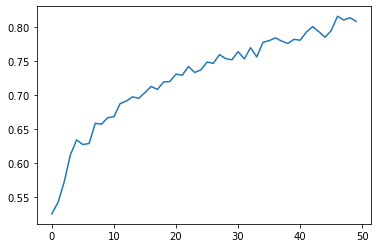

In [181]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [118]:
validation_generator

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x, )
y_pred = np.argmax(Y_pred, axis=1)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

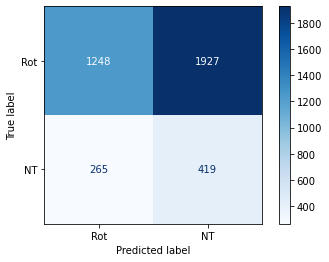

In [165]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rot', 'NT'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [56]:
x1 = Conv1D(f,4,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalMaxPooling1D()(x1)


x2 = Conv1D(f,2,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = GlobalMaxPooling1D()(x2)


x3 = Conv1D(f,3,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = GlobalMaxPooling1D()(x3)


x4 = Conv1D(f,10,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=8,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = GlobalMaxPooling1D()(x4)


x5 = Conv1D(f,20,padding='same',activation='relu',kernel_initializer=initializer)(inputs)
x5 = BatchNormalization()(x5)
x5 = GlobalMaxPooling1D()(x5)


con = concatenate([x1,x2,x3,x4,x5])
dense = Dense(1024,activation='relu')(con)
dense = Dense(512,activation='relu')(dense)
dense = Dense(256,activation='relu')(dense)
dense = Dense(128,activation='relu')(dense)
dense2 = Dense(2,activation='softmax')(dense)
model = Model(inputs=inputs, outputs=dense2)

##optimizer = Adam(lr=1e-5)
#model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 651, 2)]     0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 651, 32)      288         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 651, 32)      160         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 651, 32)      224         input_3[0][0]                    
____________________________________________________________________________________________

In [91]:
x1 = Conv1D(f,4,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalMaxPooling1D()(x1)


x2 = Conv1D(f,2,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = GlobalMaxPooling1D()(x2)


x3 = Conv1D(f,3,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = GlobalMaxPooling1D()(x3)


x4 = Conv1D(f,10,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=8,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = GlobalMaxPooling1D()(x4)


x5 = Conv1D(f,20,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x5 = BatchNormalization()(x5)
x5 = Conv1D(f,20,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x5)
x5 = BatchNormalization()(x5)
x5 = Conv1D(f,20,dilation_rate=8,padding='causal',activation='relu',kernel_initializer=initializer)(x5)
x5 = BatchNormalization()(x5)
x5 = GlobalMaxPooling1D()(x5)

x7 = Conv1D(f,20,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x7 = BatchNormalization()(x7)
x7 = Conv1D(f,20,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x7)
x7 = BatchNormalization()(x7)
x7 = Conv1D(f,20,dilation_rate=16,padding='causal',activation='relu',kernel_initializer=initializer)(x7)
x7 = BatchNormalization()(x7)
x7 = GlobalMaxPooling1D()(x7)


x6 = Conv1D(f,20,padding='same',activation='relu',kernel_initializer=initializer)(inputs)
x6 = BatchNormalization()(x6)
x6 = GlobalMaxPooling1D()(x6)


con = concatenate([x1,x2,x3,x4,x5,x6])
dense = Dense(512,activation='relu')(con)
dense = Dense(128,activation='relu')(dense)
dense2 = Dense(2,activation='softmax')(dense)
model = Model(inputs=inputs, outputs=dense2)

In [58]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, input_dim=inputs, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# con = concatenate([x1,x2,x3,x4])
# dense = Dense(512,activation='relu')(con)
# dense = Dense(256#,activation='relu')(dense)
# dense2 = Dense(1,activation='sigmoid')(dense)
# model = Model(inputs=inputs, outputs=dense2)

# optimizer = Adam(lr=1e-5)
#model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])


In [59]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [92]:
model.compile(loss='mse',
              optimizer=Adam(lr=1e-5),
              metrics=['mse', 'accuracy', 'binary_accuracy'])

model.fit(training_generator, epochs=200, steps_per_epoch=50, validation_data=validation_generator, validation_steps=25)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/50 [===================>..........] - ETA: 3s - loss: 0.3601 - mse: 0.3601 - accuracy: 0.4991 - binary_accuracy: 0.4991

KeyboardInterrupt: 

In [90]:
results = model.predict(validation_generator, batch_size=32)

In [92]:
results

array([[0.4889007 ],
       [0.49449733],
       [0.49654898],
       ...,
       [0.49573073],
       [0.50216496],
       [0.48933476]], dtype=float32)

In [36]:
from sklearn.preprocessing import scale
output = scale()
output

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass copy=[[1391.73667658  957.40513897]
 [1385.86589585  960.40309034]
 [1388.45653238  960.29137335]
 ...
 [          nan           nan]
 [          nan           nan]
 [          nan           nan]] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


StandardScaler(copy=array([[1391.73667658,  957.40513897],
       [1385.86589585,  960.40309034],
       [1388.45653238,  960.29137335],
       ...,
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan]]))

In [55]:
x_y = np.array(df[df['Track_ID']== 1][['X', 'Y']])
x_y

array([[ 267.32757102, 1641.40302581],
       [ 268.89339992, 1641.86021464],
       [ 270.08193873, 1642.08710289],
       ...,
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan]])

In [ ]:
norm = np.linalg.norm(x_y, 1)
im = x_y/norm
plt.figure(figsize=(10,500))
plt.imshow(im)

In [66]:
x_y[:2,:]

array([[ 267.32757102, 1641.40302581],
       [ 268.89339992, 1641.86021464]])

In [75]:
def scale_array(A):
    return (A-np.min(A))/(np.max(A) - np.min(A))

output = scale_array(x_y[:19,:])
output

array([[0.        , 0.99881681],
       [0.0011382 , 0.99914914],
       [0.00200215, 0.99931406],
       [0.00186857, 0.99857293],
       [0.00198115, 0.99877591],
       [0.00222902, 1.        ],
       [0.00208032, 0.99915327],
       [0.00174777, 0.99917532],
       [0.00142778, 0.99879495],
       [0.00183042, 0.99753842],
       [0.00223305, 0.99628188],
       [0.00263569, 0.99502534],
       [0.00303833, 0.99376881],
       [0.00344097, 0.99251227],
       [0.00384361, 0.99125574],
       [0.00424624, 0.9899992 ],
       [0.00464888, 0.98874266],
       [0.0044428 , 0.98914569],
       [0.0051891 , 0.98822241]])

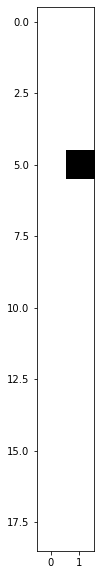

In [77]:
import cv2
%matplotlib inline
im = np.array(output).astype('uint8')
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='Greys')
# grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
# cv2.imshow(mat=grayImage)

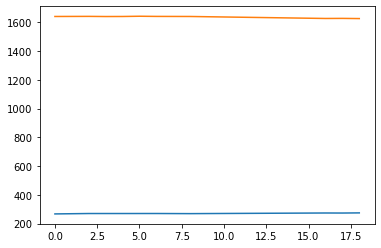

In [109]:
plt.plot(x_y)

In [64]:
def traj_generator(batch_size, datapath):
    out = np.zeros([batch_size, 651, 2]) #initialize trajectory array
    label = np.zeros([batch_size, 1]) #initialize label array
    batch_count = 0
    while True:
        df = pd.read_csv(datapath)
        for i in range(batch_size):
            batch_count += 1
            x_y = np.array(df[df['Track_ID']==i][['X', 'Y']])
            out[i,:,:] = x_y
            label[i] = 1
        yield out, label


In [42]:
inputs = Input((651, 2))
initializer = 'random_normal'
f = 32

In [43]:
x1 = Conv1D(f,4,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalMaxPooling1D()(x1)


x2 = Conv1D(f,2,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = GlobalMaxPooling1D()(x2)


x3 = Conv1D(f,3,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = GlobalMaxPooling1D()(x3)


x4 = Conv1D(f,10,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=5,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=10,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = GlobalMaxPooling1D()(x4)

con = concatenate([x1,x2,x3,x4])
dense = Dense(512,activation='relu')(con)
dense = Dense(256,activation='relu')(dense)
dense2 = Dense(1,activation='sigmoid')(dense)
model = Model(inputs=inputs, outputs=dense2)

optimizer = Adam(lr=1e-5)
model.compile(optimizer=optimizer,loss='mse',metrics=['mse', 'accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 651, 2)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 651, 32)      288         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 651, 32)      160         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 651, 32)      224         input_3[0][0]                    
______________________________________________________________________________________________

In [10]:
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [15]:
model.compile(loss='mean_absolute_error',
              optimizer=Adam(),
              metrics=['mean_squared_error'])

In [44]:
model.compile(loss='mean_absolute_error',
              optimizer=Adam(),
              metrics=['mean_squared_error', 'accuracy'])

model.fit(training_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
296/296 [==============================] - ETA: 0s - loss: 0.5000 - mean_squared_error: 0.3234 - accuracy: 0.5000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7feab3ca8560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH